## Final Project Submission

Please fill out:
* Student name: Lucas Wilkerson
* Student pace: Flex/part time
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


# Home Price Analysis 

In [ ]:
# Add Graphic 

## Project Overview 

For this project, I sought to explore how certain housing characteristics influence the price of a home in King county. Specifically, I used linear regression to show how specific housing characteristics impact the price of the home and create a model based on those variables to predict housing prices. 

## Business Problem and Stakeholder

A real estate company in King County wants to increase customer acquisition and retention by providing transparent and useful information regarding the sales prices of homes. Utilizing this data, they can assist customers/clients that are both looking to buy or sell a home, understand what to budget for with a new home or what to expect to sell their current home for. For the project specifically we will be exploring which housing characteristics are the most important and have the biggest impact on sales price.

## Data Understanding 

In [1]:
# Importing standard Packages 
import pandas as pd
import numpy as np
import math 

# Importing packages for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing packages for statistics
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import kstest

## Data Preparation

In [3]:
#Loading dataset
kc_house_df = pd.read_csv("data/kc_house_data.csv")
kc_house_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

I have read in the file and previewed the head of the dataset along with utilizing .info() to get a general idea of the dataset. We have a total of over 30,000 (30,155) data entries with very low amounts of missing values. With low amounts of missing values, I plan to drop all rows with missing values. It looks like we have 25 columns that have types that include integers, floats, and objects. Looking at the columns and data types it seems we have several numerical values and catergorical values. I may need to transform some variables but that will be determined as I explore more into the data.

In [6]:
#Dropping all rows with null values and checking for duplicate values/rows
kc_house_df.dropna(inplace= True)

# Checking for duplicates using the id column
duplicates = kc_house_df[kc_house_df.duplicated(
subset = "id")]
print(duplicates.shape)
duplicates.head()


(1, 25)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [7]:
#Diplucate row has been dropped
kc_house_df = kc_house_df.drop_duplicates()
kc_house_df.drop(["id"], axis = 1, inplace = True)

# Using .shape to check for number of rows and columns
print(kc_df.shape)

# Using .info() to check out columns, datatypes and to check for dropped values
print(kc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30110 non-null  object 
 1   price          30110 non-null  float64
 2   bedrooms       30110 non-null  int64  
 3   bathrooms      30110 non-null  float64
 4   sqft_living    30110 non-null  int64  
 5   sqft_lot       30110 non-null  int64  
 6   floors         30110 non-null  float64
 7   waterfront     30110 non-null  object 
 8   greenbelt      30110 non-null  object 
 9   nuisance       30110 non-null  object 
 10  view           30110 non-null  object 
 11  condition      30110 non-null  object 
 12  grade          30110 non-null  object 
 13  heat_source    30110 non-null  object 
 14  sewer_system   30110 non-null  object 
 15  sqft_above     30110 non-null  int64  
 16  sqft_basement  30110 non-null  int64  
 17  sqft_garage    30110 non-null  int64  
 18  sqft_p

Duplicates and null values were dropped along with the id column as this column is not needed. Called .info() to confirm changes. We now have a total of 30,110 entries regarding home sales with 24 columns. 

In [9]:
#Inspecting value counts for all variables
for col in kc_house_df:
    print(kc_house_df[col].value_counts(), "\n")

7/1/2021      196
8/2/2021      186
6/23/2021     176
7/6/2021      176
6/16/2021     174
             ... 
12/5/2021       1
12/25/2021      1
1/16/2022       1
6/9/2022        1
12/26/2021      1
Name: date, Length: 365, dtype: int64 

650000.0     345
750000.0     306
800000.0     298
850000.0     296
600000.0     295
            ... 
903888.0       1
576200.0       1
1081500.0      1
2698000.0      1
720902.0       1
Name: price, Length: 5199, dtype: int64 

3     12745
4      9591
2      3925
5      2794
6       498
1       381
7        80
0        39
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64 

2.5     8471
2.0     7343
1.0     4556
3.0     4116
3.5     2264
1.5     1807
4.0      644
4.5      531
5.0      145
5.5      102
6.0       45
0.0       25
6.5       25
7.5       12
7.0       12
0.5        5
9.5        2
8.0        2
8.5        1
10.0       1
10.5       1
Name: bathrooms, dtype: int64 

1250    192
1400    190
1560    183
1900 

The dataset now contains 30110 rows with 25 columns and no missing values. Datatypes for the columns include integers, floats and objects. 

- Ten columns have their datatypes as objects while 15 are numeric.

- The grade column mixes two datatypes in which it has a numeric value(formatted as a string) and an object (as a string).

- Waterfront, greenbelt, nuisance, view, condition, heat_source, and sewer_system all have categorical data. We need to transform there to numeric data for future analysis.

- The view column has five different categories: NONE, AVERAGE, GOOD, EXCELLENT, FAIR. In this column, it seems 26,589 rows (88.2% of the dataset) are categorized as NONE. 

- Sqft_basement has 15,471 entries with a value of 0. This is roughly 51.3% of the dataset. It may be useful to change this variable to a categorical variable indicating if there is a basement or not (YES/NO). YES if the value is greater than 0 and NO if the value is 0. 

- Sqft_garage and sqft_patio are similar to to sqft_basement and could be simplified to a catergorical variable utilizing YES/NO. 

- Looking at the value_counts above we see that 39 houses have 0 bedrooms. We would expect every house to have at least 1 bedroom. With 39 being a very small percentage of the dataset we could drop these rows. 

- Looking at the value_counts above we see that 30 houses have less than 1 (either 0 or 0.5) bathrooms.  We would expect every house to have at least 1 full bathroom. With 30 being a very small percentage of the dataset we could drop these rows


In [10]:
# Dropping rows with bathrooms and bedrooms less than 1
kc_house_df = kc_house_df[kc_house_df["bedrooms"] >= 1]
kc_house_df = kc_house_df[kc_house_df["bathrooms"] >= 1]
print(kc_house_df["bedrooms"].value_counts(), kc_house_df["bathrooms"].value_counts())

print(kc_house_df.info())

3     12743
4      9588
2      3924
5      2794
6       498
1       378
7        80
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64 2.5     8471
2.0     7342
1.0     4541
3.0     4116
3.5     2264
1.5     1806
4.0      643
4.5      531
5.0      145
5.5      102
6.0       45
6.5       25
7.0       12
7.5       12
9.5        2
8.0        2
8.5        1
10.0       1
10.5       1
Name: bathrooms, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30062 entries, 0 to 30154
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30062 non-null  object 
 1   price          30062 non-null  float64
 2   bedrooms       30062 non-null  int64  
 3   bathrooms      30062 non-null  float64
 4   sqft_living    30062 non-null  int64  
 5   sqft_lot       30062 non-null  int64  
 6   floors         30062 non-null  float64
 7   waterfront     30062 non-null  object 
 

After dropping rows with bathroom and bedroom totals less than one, the dataset now has 30062 entries. 

In [12]:
# Checking general statistics of dataset 
kc_house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.006200e+04,30062.000000,30062.000000,30062.000000,3.006200e+04,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000
mean,1.108769e+06,3.419899,2.338550,2114.614330,1.660457e+04,1.543044,1811.144701,477.145200,330.809394,217.694332,1975.153749,90.806999,47.328463,-121.318416
std,8.938315e+05,0.972436,0.885519,972.460457,5.951967e+04,0.566942,877.234560,579.829633,285.682708,245.385208,32.041445,416.226781,1.433399,5.725870
min,2.736000e+04,1.000000,1.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,6.495000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405378,-122.325979
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.478000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551443,-122.225558
75%,1.300000e+06,4.000000,3.000000,2620.000000,1.056250e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669889,-122.116404
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Looking over the initial general statistics here are a few quick insights into the data:

- The average price of a house in King county is approximately 1,108,769 USD with the median price being 860,000 USD, the maximum price being 30,750,000 USD and the minimum price being 27,360 USD. The standard deviation of the price is 893,831.50 USD.

- The average square foot of living space (sqft_living) of a house in King Count is approximately 2114.61 square feet with the median being 1920.00 square feet, the maximum being 15,360 square feet, the minimum being 3 square feet and the standard deviation being 972.46 . The minimum being 3 square feet does not seem like it would be correct and may be an error. This warrants more investigation into that lower value.

- The average number of bedrooms of a house in King County is 3.42 bedrooms, with the median number of bedrooms being 3, the maximum number of bedrooms being 13 and the minimum number being 1 (after dropping rows with bedroom totals less than 1). The standard deviation is 0.97. 

- The average number of bathrooms of a house in King County is 2.34 bathrooms, with the median number of bathrooms being 2.5, the maximum number of bathrooms being 10.5 and the minimum number now being 1 (after dropping rows with bathrooms totals less than 1). The standard deviation is 0.885.  

- The average number of floors of a house in King County is 1.54 floors, with the median number being 1.5, the maximum number being 4 and the minimum number being 1. The standard deviation is 0.567. 

In [13]:
# Making copy of current df 
kc_copy = kc_house_df.copy()
kc_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30062 entries, 0 to 30154
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30062 non-null  object 
 1   price          30062 non-null  float64
 2   bedrooms       30062 non-null  int64  
 3   bathrooms      30062 non-null  float64
 4   sqft_living    30062 non-null  int64  
 5   sqft_lot       30062 non-null  int64  
 6   floors         30062 non-null  float64
 7   waterfront     30062 non-null  object 
 8   greenbelt      30062 non-null  object 
 9   nuisance       30062 non-null  object 
 10  view           30062 non-null  object 
 11  condition      30062 non-null  object 
 12  grade          30062 non-null  object 
 13  heat_source    30062 non-null  object 
 14  sewer_system   30062 non-null  object 
 15  sqft_above     30062 non-null  int64  
 16  sqft_basement  30062 non-null  int64  
 17  sqft_garage    30062 non-null  int64  
 18  sqft_p

## Data Preparation

In [14]:
# Using One-Hot Encoding for columnc waterfront, greenbelt, nuisance 
kc_encoded = pd.get_dummies(kc_copy, columns= ['waterfront', 'greenbelt', 'nuisance'])
kc_encoded.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,yr_renovated,address,lat,long,waterfront_NO,waterfront_YES,greenbelt_NO,greenbelt_YES,nuisance_NO,nuisance_YES
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NONE,Good,7 Average,...,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,1,0,1,0,1,0
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,AVERAGE,Average,7 Average,...,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,1,0,1,0,0,1
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,AVERAGE,Average,7 Average,...,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,1,0,1,0,1,0
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,AVERAGE,Average,9 Better,...,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,1,0,1,0,1,0
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NONE,Average,7 Average,...,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,1,0,1,0,0,1


In [15]:
#Dropping dummie columns for NO, remaming YES columns
#Columns will now represent 1 = YES or has feature and 0 = NO or does not have feature
kc_encoded.drop(columns= ['waterfront_NO', 'greenbelt_NO', 'nuisance_NO'], inplace = True)
kc_encoded.rename(columns={'waterfront_YES': 'Waterfront', 
                           'greenbelt_YES': 'Greenbelt', 
                           'nuisance_YES':'Nuisance'}, inplace= True)
kc_encoded.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,Waterfront,Greenbelt,Nuisance
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NONE,Good,7 Average,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,0,0,0
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,AVERAGE,Average,7 Average,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,0,0,1
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,AVERAGE,Average,7 Average,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,0,0,0
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,AVERAGE,Average,9 Better,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,0,0,0
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NONE,Average,7 Average,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,0,0,1


In [17]:
# Checking value counts to confirm data
print(kc_encoded['Waterfront'].value_counts())
print(kc_house_df['waterfront'].value_counts())

0    29556
1      506
Name: Waterfront, dtype: int64
NO     29556
YES      506
Name: waterfront, dtype: int64


In [18]:
for column in kc_encoded.columns:
    print(f"Unique values in column '{column}': \n{kc_encoded[column].unique()}")
    print(f"Values distribution '{column}': \n{kc_encoded[column].value_counts()}\n")

Unique values in column 'date': 
['5/24/2022' '12/13/2021' '9/29/2021' '12/14/2021' '8/24/2021' '7/20/2021'
 '11/17/2021' '4/28/2022' '3/17/2022' '6/21/2021' '6/1/2022' '6/11/2021'
 '6/25/2021' '11/15/2021' '8/26/2021' '3/28/2022' '6/16/2021' '3/23/2022'
 '3/24/2022' '9/28/2021' '10/19/2021' '2/28/2022' '12/28/2021'
 '11/19/2021' '11/4/2021' '10/8/2021' '5/4/2022' '2/26/2022' '9/7/2021'
 '9/13/2021' '8/18/2021' '8/20/2021' '8/16/2021' '4/11/2022' '11/3/2021'
 '3/2/2022' '6/29/2021' '4/1/2022' '11/20/2021' '8/25/2021' '3/16/2022'
 '7/9/2021' '3/22/2022' '6/14/2021' '11/12/2021' '11/5/2021' '6/23/2021'
 '7/22/2021' '6/2/2022' '5/19/2022' '5/3/2022' '9/10/2021' '2/15/2022'
 '8/31/2021' '4/13/2022' '12/7/2021' '4/19/2022' '5/31/2022' '7/29/2021'
 '6/18/2021' '9/16/2021' '6/20/2021' '10/21/2021' '10/29/2021' '7/21/2021'
 '12/8/2021' '12/11/2021' '12/6/2021' '12/20/2021' '8/2/2021' '1/14/2022'
 '3/7/2022' '11/29/2021' '11/30/2021' '4/2/2022' '5/2/2022' '8/13/2021'
 '9/14/2021' '1/21/2022' '7

Next columns to address are view, condition, grade, heat_source, sewer_system, sqft_basement, sqft_garage, sqft_patio

In [19]:
#Using Custom Mapping to map catergories to numeric values 
# in columns view, condition, heat_source, and sewer_system from 

mapping_view = {'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}
mapping_condition = {'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}
mapping_heat_source = {'Gas': 1, 'Oil': 2, 'Electricity': 3, 'Gas/Solar': 4, 'Electricity/Solar': 5, 
                       'Oil/Solar': 6, 'Other': 0}
mapping_sewer_system = {'PUBLIC': 1, 'PRIVATE': 2, 'PRIVATE RESTRICTED': 3, 'PUBLIC RESTRICTED': 4}

#mapping the numeric values to column categories
kc_encoded['view_encoded'] = kc_encoded['view'].map(mapping_view)
kc_encoded['condition_encoded'] = kc_encoded['condition'].map(mapping_condition)
kc_encoded['heat_source_encoded'] = kc_encoded['heat_source'].map(mapping_heat_source)
kc_encoded['sewer_system_encoded'] = kc_encoded['sewer_system'].map(mapping_sewer_system)

#viewing new columns

kc_encoded.head()
print(kc_encoded.dtypes)

date                     object
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
view                     object
condition                object
grade                    object
heat_source              object
sewer_system             object
sqft_above                int64
sqft_basement             int64
sqft_garage               int64
sqft_patio                int64
yr_built                  int64
yr_renovated              int64
address                  object
lat                     float64
long                    float64
Waterfront                uint8
Greenbelt                 uint8
Nuisance                  uint8
view_encoded              int64
condition_encoded         int64
heat_source_encoded       int64
sewer_system_encoded      int64
dtype: object


In [23]:
# Change the date column datetime format and add month column
kc_encoded['date'] = pd.to_datetime(kc_encoded['date'])
kc_encoded['month'] = pd.DatetimeIndex(kc_encoded['date']).month

# Change the yr_built column to datetime
kc_encoded['yr_built'] = pd.to_datetime(kc_encoded['yr_built'],format='%Y').dt.year

# Adding Age column to have age of house when sold
kc_encoded['Age'] = (pd.to_datetime(kc_encoded['date'],format='%Y').dt.year)- kc_encoded['yr_built'] 

# Change yr_renovated column to binary numeric value using defined custom function assuming that 
#0 = not renovated and anything >0 = has been renovated 
def has_doesnt_have(value):
    if value > 0:
        return 1
    else:
        return 0
kc_encoded['renovated'] = kc_encoded['yr_renovated'].apply(has_doesnt_have)

# Checking .info() for changes 
kc_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30062 entries, 0 to 30154
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  30062 non-null  datetime64[ns]
 1   price                 30062 non-null  float64       
 2   bedrooms              30062 non-null  int64         
 3   bathrooms             30062 non-null  float64       
 4   sqft_living           30062 non-null  int64         
 5   sqft_lot              30062 non-null  int64         
 6   floors                30062 non-null  float64       
 7   view                  30062 non-null  object        
 8   condition             30062 non-null  object        
 9   grade                 30062 non-null  object        
 10  heat_source           30062 non-null  object        
 11  sewer_system          30062 non-null  object        
 12  sqft_above            30062 non-null  int64         
 13  sqft_basement   

In [24]:
# Change grade to numeric variable 
kc_encoded['grade'] = kc_encoded['grade'].str.split().str[0].astype(int) 

# dropping columns lat, long, address, date as these are not being used for analysis
# dropping categorical columns of view, condition, heat_source, sewer_system, yr_renovated as we have 
# these already represented with either dummy columns or a new column
kc_baseline = kc_encoded.drop([
   "lat", "long", "address",'view', 'condition', 'heat_source', 'sewer_system', 'date', 'yr_renovated'], axis=1)
kc_baseline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30062 entries, 0 to 30154
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 30062 non-null  float64
 1   bedrooms              30062 non-null  int64  
 2   bathrooms             30062 non-null  float64
 3   sqft_living           30062 non-null  int64  
 4   sqft_lot              30062 non-null  int64  
 5   floors                30062 non-null  float64
 6   grade                 30062 non-null  int64  
 7   sqft_above            30062 non-null  int64  
 8   sqft_basement         30062 non-null  int64  
 9   sqft_garage           30062 non-null  int64  
 10  sqft_patio            30062 non-null  int64  
 11  yr_built              30062 non-null  int64  
 12  Waterfront            30062 non-null  uint8  
 13  Greenbelt             30062 non-null  uint8  
 14  Nuisance              30062 non-null  uint8  
 15  view_encoded       

## Data Analysis

In [27]:
# Generating correlations between the independent variables and the target variable
kc_baseline.corr()["price"].sort_values(ascending= False)

price                   1.000000
sqft_living             0.612011
grade                   0.569784
sqft_above              0.541596
bathrooms               0.483939
view_encoded            0.316326
sqft_patio              0.315132
bedrooms                0.293157
sqft_garage             0.265115
sqft_basement           0.245927
Waterfront              0.233624
floors                  0.182296
yr_built                0.096709
sqft_lot                0.085546
renovated               0.085409
Greenbelt               0.068233
Nuisance                0.012340
condition_encoded      -0.010997
sewer_system_encoded   -0.021097
month                  -0.053366
Age                    -0.095548
heat_source_encoded    -0.131784
Name: price, dtype: float64

Looking at the correlations of the current numeric variables we see that the top 3 highest correlates are:
- Sqft_living: highest correlation at 0.61
- Grade : 2nd highest correlation at 0.57
- Sqft_above: 3rd highest correlation at 0.54
- Bathrooms (# of bathrooms): 4th highest correlation of 0.48

Other noteable characteristics correlations include:
- Bedrooms (# of bedrooms): correlation of 0.29
- Floors (number of floors/levels): correlation of 0.18
- Yr_built: correlation of 0.096

Square footage having the highest correlation does seem appropropriate. Surprisingly number of bedrooms was not among the highest charactristics regarding correlation, however it does show a positive but weak correlation. 

The columns sqft_garage, sqft_basement and waterfront have positive but relatively weaker correlations (correlation values between 0.2-0.3). 

## Distribution of Target: "Price"

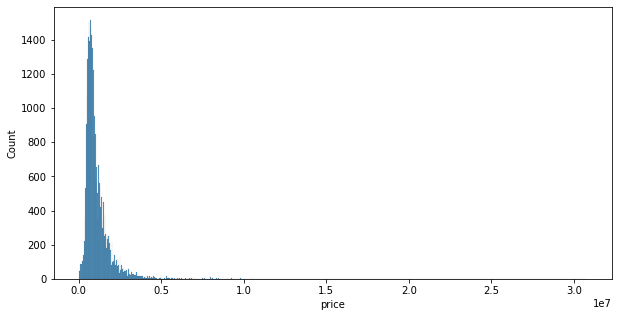

In [28]:
#Plotting a histogram to check the distribution of the price
plt.figure(figsize=(10,5))
sns.histplot(kc_baseline['price'])  
plt.show();

We can see by the histogram that price is slightly skewed to the right. This is more than likely due to a few homes with higher price values. 

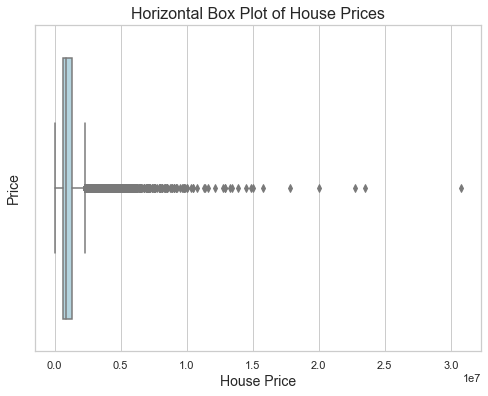

In [29]:
# Creating boxplot to assess for outliers 

sns.set(style="whitegrid")

# Create the horizontal box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=kc_baseline, x='price', color='lightblue', orient='h')

# Add title and axis labels
plt.title('Horizontal Box Plot of House Prices', fontsize=16)
plt.xlabel('House Price', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Show the plot
plt.show()

We see by the box plot that we he a few homes with alot larger prices than the rest. We may need to eliminate and adjust for outliers. 

## Checking Distribution of Independent Variables 

In [ ]:
# First checking back over statistics to look for any variables that may have potential outliers 
kc_baseline.describe()

Don't need box plot for waterfront, greenbelt, nuisance, view_encoded, heat_source_encoded, condition encoded, sewer_system_encoded, renovated.

In [30]:
# creating separate df to contain columns for boxplots
kc_boxcol = kc_baseline.drop(['Waterfront', 'Greenbelt', 'Nuisance', 'view_encoded', 
                              'heat_source_encoded', 'condition_encoded', 'sewer_system_encoded', 'renovated'],
                             axis=1).copy()

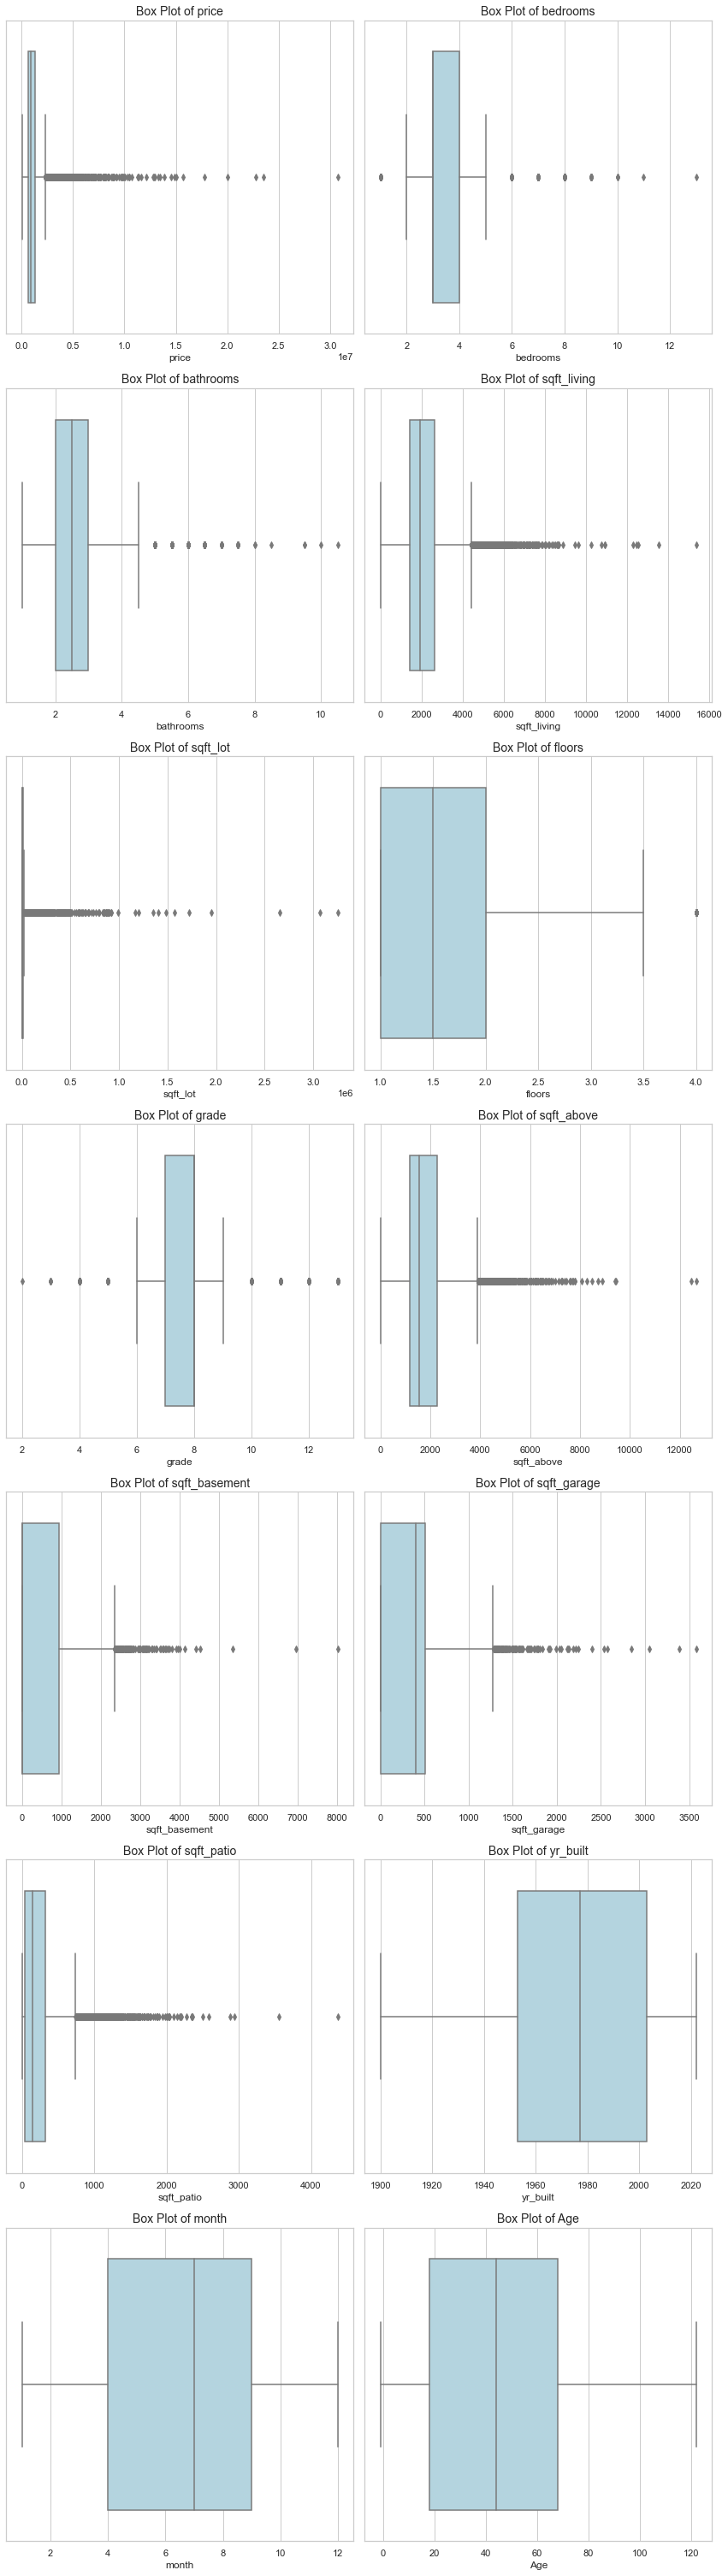

In [31]:
sns.set(style="whitegrid")

# Determine the number of rows and columns for the subplots
num_rows = (len(kc_boxcol.columns) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array to easily iterate through the subplots
axes = axes.flatten()

# Loop through each column and create box plots
for i, column in enumerate(kc_boxcol.columns):
    sns.boxplot(x=kc_boxcol[column], ax=axes[i], color='lightblue')
    axes[i].set_title(f"Box Plot of {column}", fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)

# Remove any extra subplots if necessary
for i in range(len(kc_boxcol.columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

May need to adjust sqft_basement, sqft_garage, sqft_patio.

Also need to look more into sqft_lot. 

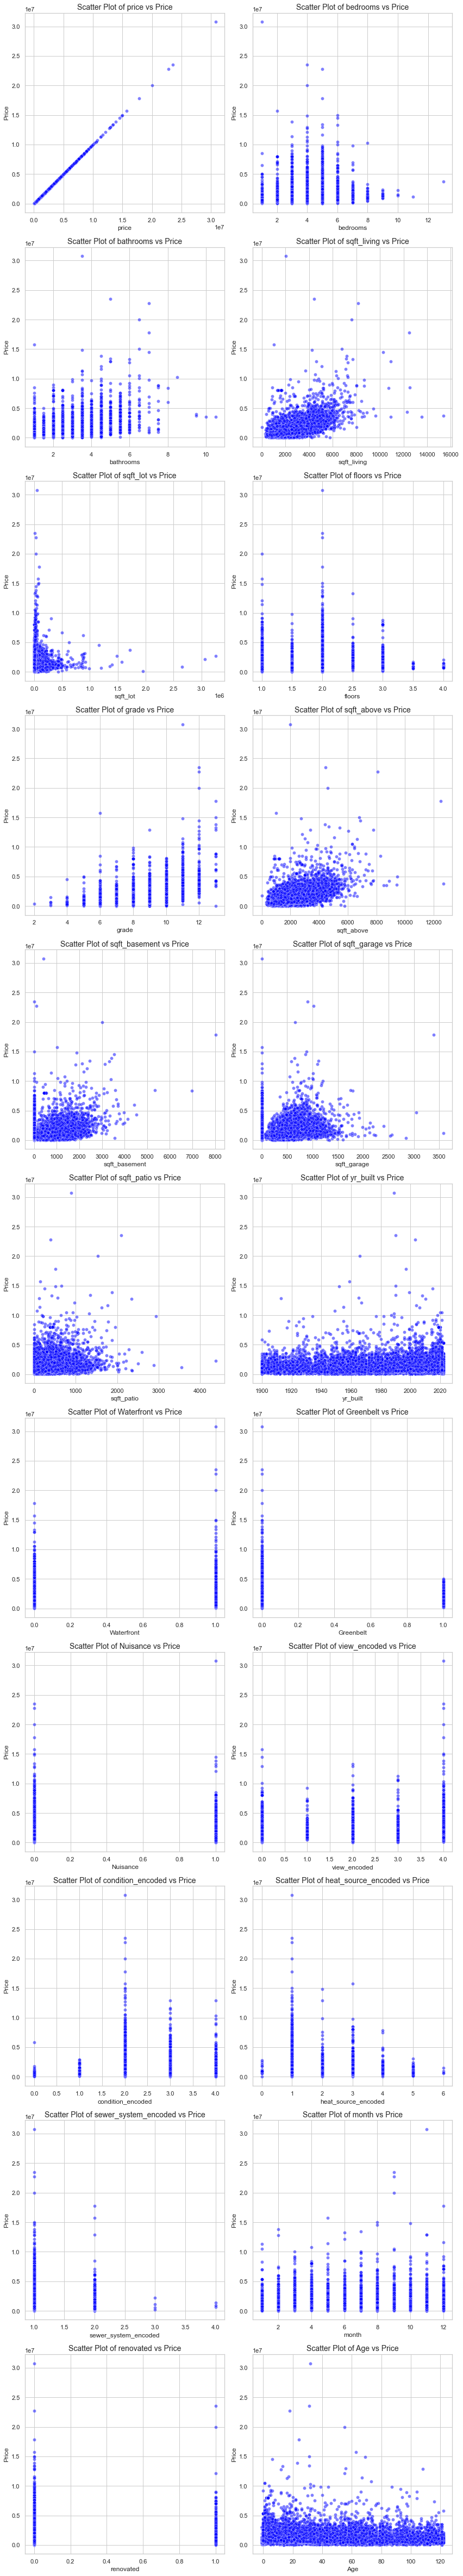

In [32]:
# Before adjust let's look at the scatter plots for the variables

# Set the style for the plot 
sns.set(style="whitegrid")

# Determine the number of rows and columns for the subplots
num_rows = (len(kc_baseline.columns) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array to easily iterate through the subplots
axes = axes.flatten()

# Loop through each column and create scatter plots
for i, column in enumerate(kc_baseline.columns):
    sns.scatterplot(data=kc_baseline, x=column, y='price', ax=axes[i], color='blue', alpha=0.5)
    axes[i].set_title(f"Scatter Plot of {column} vs Price", fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Price', fontsize=12)

# Remove any extra subplots if necessary
for i in range(len(kc_baseline.columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

## Linear Regression
### Baseline Model 

The first baseline model to be ran with include almost of the characteristic variables. 

In [33]:
# Setting up variables for model 

y = kc_baseline["price"]

X_baseline = kc_baseline.drop(['price'], axis=1) 

# The Independent variable X_baseline is a dataframe that has eliminated the target variable 'price' 

Running Baseline Model 

In [34]:
# Running baseline model and getting the summary
baseline_model= sm.OLS(y, sm.add_constant(X_baseline))
baseline = baseline_model.fit()

print(baseline.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     1458.
Date:                Sun, 30 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:53:52   Log-Likelihood:            -4.4404e+05
No. Observations:               30062   AIC:                         8.881e+05
Df Residuals:                   30040   BIC:                         8.883e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.085e+08 

Checking for RMSE and MAE using SKlearn

In [35]:
y_predbaseline = baseline.predict(sm.add_constant(X_baseline))
# use fitted model to generate predictions for y

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y, y_predbaseline))
print(mean_squared_error(y, y_predbaseline, squared=False))

347798.8545994633
629040.7194708611


### Baseline Model Interpretation

- With our baseline model, the R-squared value is 0.505, suggesting that approximately 50.5% of the variance in the "price" variable can be explained by the independent variables in the model. The F-statistic is 1458, and the associated p-value (Prob (F-statistic)) is very close to zero (0.00) which indicates that the model is statistically significant and performs better than a model with no predictors. 
- Looking at our independent variables we see that all are significant at an alpha level of 0.05 except for Greenbelt. 
- Our baseline model has quite high error metrics with an MAE of 347,798.85 and RMSE of 629,040.72.

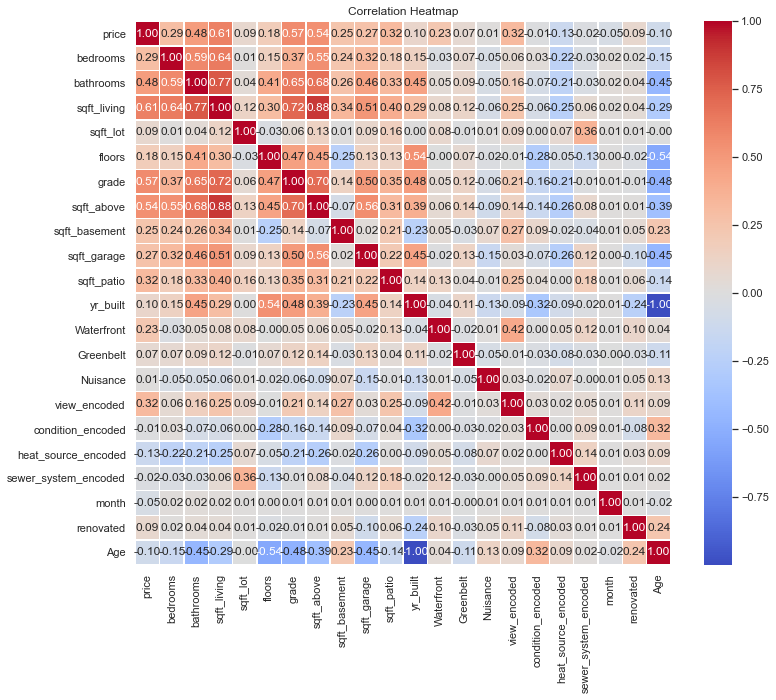

In [41]:
# Calculate the correlation matrix
correlation_matrix = kc_baseline.corr()

# Set up the heatmap figure
plt.figure(figsize=(12, 10))

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title and show the plot
plt.title("Correlation Heatmap")
plt.show()

In [42]:
df=kc_baseline.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"

df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs

df.set_index(['pairs'], inplace = True)

#drop level columns

df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0

df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.

df.drop_duplicates(inplace=True)


In [43]:
#Checking for variables with high multicolinearity of > 0.75
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(Age, yr_built)",0.999888
"(sqft_above, sqft_living)",0.883590
"(sqft_living, bathrooms)",0.774361


Dropping columns (Age or yr_built), sqft_above and bathrooms due to higher multicollinearity with sqft_living. Kept sqft_living due to it being variable with highest correlation with price. Also dropping greenbelt due to high p-value.

In [ ]:
#kc_baseline2 = kc_baseline.drop(['sqft_above', "bathrooms", "Greenbelt"], axis=1)

## Model 2

In [ ]:
# Setting up variables for model 

#y = kc_baseline2["price"]

#X_baseline2 = kc_baseline2.drop(['price'], axis=1) 

# The Independent variable X_baseline2 is a dataframe that has eliminated the target variable 'price' 

In [ ]:
# Runnimng baseline model and getting the summary
#baseline_model2= sm.OLS(y, sm.add_constant(X_baseline2))
#baseline2 = baseline_model2.fit()

#print(baseline2.summary())

In [ ]:
#y_predbaseline2 = baseline2.predict(sm.add_constant(X_baseline2))
# use fitted model to generate predictions for y
#print(f"MAE for model 2: {mean_absolute_error(y, y_predbaseline2)}")
#print(f"RSME for model 2: {mean_squared_error(y, y_predbaseline2, squared=False)}")

## Modeling 

## Regression Results 

## Conclusion/ Recommendations

## Limitations